In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import random as rand
import numpy as np
from network import Network
from perceptron import Perceptron
from scores import Scores
from util import idem, one, sigmoid, derivative_sigmoid as der_sigm
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import pandas as pd

In [4]:
%matplotlib inline
sns.set()

In [5]:
def plot(pontos, a, b):
    px = [p[0] for p in pontos]
    py = [p[1] for p in pontos]
    y = [a*x + b for x in px]
    plt.figure(figsize=(8,6))
    plt.plot(px, py, 'g.')
    plt.plot(px, y, 'r--')
    plt.show()

### Método mais rápido para iterar dataframes como uma lista => df.itertuples()

In [ ]:
def reta(ponto):
    return ponto[0] + ponto[1] - 10

def sinal(ponto):
    return 1 if reta(ponto) >= 0 else 0

x_train, y_train = [], []
for i in range(1000):
    x_train.append([rand.random()*50-25, rand.random()*50-25])
    y_train.append([sinal(x_train[i])])

df_x_train = pd.DataFrame(x_train)
plt.plot(np.array(df_x_train.loc[:,0]), np.array(df_x_train.loc[:,1]), ".")
plt.show()

In [ ]:
pd.DataFrame(x_train).hist()
plt.show()

In [ ]:
network = Network([2, 1, 1], taxa=0.08, ativacoes=[sigmoid, der_sigm, idem, one])
a = network.layers[2].neurons[0].weights[0]
b = network.layers[2].neurons[0].bias
mse = network.norma_l2(x_train, y_train)
print("Início: %f*x + %f => MSE = %f"%(a, b, mse))
plot(x_train, a, b)

In [ ]:
for k in tqdm(range(100)):
    network.train(x_train, y_train)

In [ ]:
for layer in network.layers[1:]:
    for neuron in layer.neurons:
        print(neuron.weights, neuron.bias)
        
a = network.layers[1].neurons[0].weights[0]
b = network.layers[1].neurons[0].bias
mse = network.norma_l2(x_train, y_train)
print("Após %d passos: %f*x + %f => MSE = %f"%(k, a, b, mse))
plot(x_train, -a, -b)

In [ ]:
def sinal_reverso(num):
    return 1 if num[0] >= 0.5 else 0

network.predict([[1, 1], [-1, 1], [1, -1], [-1, -1], [0, 0]], sinal_reverso)

### Me parece que o esquema será gerar um framework pra otimização linear dentro da própria classe network, pq a classe perceptron já tá muito bem feita para o caso não-linear, e com ativação por sinal

In [83]:
def sinal(ponto):
    return "1 Quadrante" if ponto[0] >= 0 and ponto[1] >= 0 else "Outros"

x_train, y_train = [], []
for i in range(1000):
    x_train.append([rand.random()*50-25, rand.random()*50-25])
    y_train.append([sinal(x_train[i])])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [171]:
from perceptron import Perceptron
perceptron = Perceptron(M=50, taxa=0.1, estrategia="acuracia", debug=1)
perceptron.tqdm = tqdm
perceptron.ativacao_saida = idem
perceptron.der_ativacao_saida = one

In [172]:
perceptron.treinar(x_train, y_train)
print("Estrutura da rede:", perceptron.network.estrutura)

Neurônios: [2]



Acurácia: 0.999 | MSE: 0.011
Taxa=0.100 | Estrutura=[2, 2, 2]

Estrutura da rede: [2, 2, 2]


In [160]:
# exibindo pesos e viéses das camadas, exceto de entrada
for layer in perceptron.network.layers[1:]:
    for neuron in layer.neurons:
        print(neuron.weights, neuron.bias)

[0.01515598 4.65123941] -0.6050540674015681
[ 4.13404654 -0.09314814] 0.9013913686023008
[0.48667716 0.43184586] -0.2346817721367501
[-0.48667716 -0.43184586] 1.23468177213675


In [161]:
saidas = perceptron.processar([[1, 1], [-1, 1], [1, -1], [-1, -1]])
for s in saidas:
    print(s)
previsoes = perceptron.prever([[1, 1], [-1, 1], [1, -1], [-1, -1]])
for p in previsoes:
    print(p)

[1, 1]
0 [1, 1]
1 [0.98306581 0.99291236]
2 [0.672539 0.327461]
[-1, 1]
0 [-1, 1]
1 [0.98255373 0.03469651]
2 [0.25848823 0.74151177]
[1, -1]
0 [1, -1]
1 [0.00526635 0.99410997]
2 [0.19718352 0.80281648]
[-1, -1]
0 [-1, -1]
1 [0.00510992 0.04150673]
2 [-0.21427038  1.21427038]
[0.672539 0.327461]
[0.25848823 0.74151177]
[0.19718352 0.80281648]
[-0.21427038  1.21427038]
[1, 1]
0 [1, 1]
1 [0.98306581 0.99291236]
2 [0.672539 0.327461]
[-1, 1]
0 [-1, 1]
1 [0.98255373 0.03469651]
2 [0.25848823 0.74151177]
[1, -1]
0 [1, -1]
1 [0.00526635 0.99410997]
2 [0.19718352 0.80281648]
[-1, -1]
0 [-1, -1]
1 [0.00510992 0.04150673]
2 [-0.21427038  1.21427038]
['1 Quadrante']
['Outros']
['Outros']
['Outros']


In [155]:
x_test, y_test = [], []
for i in range(2000):
    x_test.append([rand.random()*50-25, rand.random()*50-25])
    y_test.append([sinal(x_test[i])])
x_test = np.array(x_test)
y_test = np.array(y_test)

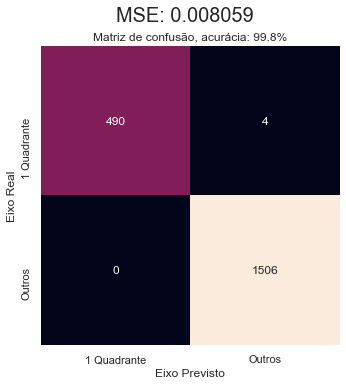

In [157]:
y_pred = perceptron.prever(x_test)
mse = perceptron.funcao_erro(x_test, y_test)
score = Scores(y_test, y_pred)
score.exibir_grafico("MSE: %f"%mse)

In [ ]:
%%timeit -r 1 -n 1
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[1]) 
plt.show() 

In [ ]:
%load_ext autoreload
%autoreload 2

In [73]:
from sklearn.datasets import load_digits # versao 8x8
from util import normalizar
import numpy as np
mnist = load_digits()

In [78]:
_N = int(mnist.data.shape[0]*0.85)
x_train, y_train = mnist.data[:_N], mnist.target[:_N].astype(np.uint8)
x_test, y_test = mnist.data[_N:], mnist.target[_N:].astype(np.uint8)
x_train[2]

array([ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
       14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
        1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
        0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16.,
       16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.])

In [ ]:
dados = x_test
print(dados)

normalizar(dados)

print(dados)